In [1]:
!pip install faker
import pandas as pd
import numpy as np
from faker import Faker
from datetime import datetime
from google.colab import files

# Initialize
fake = Faker('en_US')
np.random.seed(42)

def generate_comprehensive_dataset(n_records=1500):
    print(f"🚀 Generating {n_records} records or 2025 Sterling Financial Dataset")

    data = []
    # Defining sectors with specific financial weights
    sectors = {
        'Technology': {'inc': 1.4, 'risk': 1.1, 'save': 0.08},
        'Healthcare': {'inc': 1.3, 'risk': 0.8, 'save': 0.15},
        'Finance': {'inc': 1.5, 'risk': 0.9, 'save': 0.20},
        'Retail': {'inc': 0.8, 'risk': 1.3, 'save': 0.05},
        'Manufacturing': {'inc': 1.1, 'risk': 1.0, 'save': 0.12},
        'Services': {'inc': 0.9, 'risk': 1.1, 'save': 0.10},
        'Real Estate': {'inc': 1.2, 'risk': 1.2, 'save': 0.07},
        'Education': {'inc': 0.8, 'risk': 0.7, 'save': 0.18}
    }

    sector_names = list(sectors.keys())

    for i in range(n_records):
        # 1. Sector Selection
        sector = np.random.choice(sector_names)
        w = sectors[sector]

        # 2. Temporal & Geography
        record_date = datetime(2025, np.random.randint(1, 13), np.random.randint(1, 28))
        location = f"{fake.state()}, US"

        # 3. Sector-Linked Financials
        income = max(25000, min(300000, np.random.lognormal(11, 0.4) * w['inc']))
        credit_score = int(max(300, min(850, np.random.normal(700 - (w['risk'] * 20), 70))))
        age = max(18, min(75, int(np.random.normal(42, 12))))
        loan_amount = round(min(income * 3.5, np.random.exponential(45000)), 2)

        # New: Savings Ratio (Base + Sector Bias + Random Variance)
        savings_ratio = max(0.01, min(0.40, w['save'] + np.random.normal(0, 0.05)))

        # Performance Metrics
        debt_to_income = round(np.random.beta(2, 5) * 0.5 * w['risk'], 3)
        credit_utilization = round(min(0.99, np.random.uniform(0.1, 0.8) * w['risk']), 2)
        payment_punctuality = round(max(0, min(100, np.random.uniform(85, 100) - (w['risk'] * 5))), 2)

        # 4. Feedback
        templates = ["Excellent rates", "Process was slow", "High fees", "Standard banking", "Quick approval"]
        feedback = np.random.choice(templates) if np.random.random() > 0.05 else None

        # 5. Target Variable (Default History)
        # Logic: High savings ratio reduces default probability
        default_prob = 1 / (1 + np.exp(-(-4.0 + (800-credit_score)*0.01 + debt_to_income*5 - savings_ratio*10)))
        default = 1 if np.random.random() < default_prob else 0

        record = {
            'date': record_date.strftime('%Y-%m-%d'),
            'customer_id': f"CUST-{2025000 + i}",
            'location': location,
            'business_sector': sector,
            'age': age,
            'income': round(income, 2),
            'credit_score': credit_score,
            'savings_ratio': round(savings_ratio, 3), # Added Column
            'loan_amount': loan_amount,
            'debt_to_income': debt_to_income,
            'credit_utilization': credit_utilization,
            'payment_punctuality': payment_punctuality,
            'customer_feedback': feedback,
            'default_history': default
        }
        data.append(record)

    df = pd.DataFrame(data)
    df['customer_feedback'] = df['customer_feedback'].fillna("Neutral: No feedback provided.")

    file_name = "financial_data_2025_assignment.csv"
    df.to_csv(file_name, index=False)

    return df, file_name

# Execute
df, filename = generate_comprehensive_dataset(1500)

# --- DISPLAY ---
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1200)
pd.set_option('display.max_colwidth', 40)
display_df = df.head(10).copy()

# Formatting for display
display_df['income'] = display_df['income'].apply(lambda x: f"${x:,.0f}")
display_df['loan_amount'] = display_df['loan_amount'].apply(lambda x: f"${x:,.0f}")
display_df['savings_ratio'] = display_df['savings_ratio'].apply(lambda x: f"{x*100:.1f}%")
display_df['debt_to_income'] = display_df['debt_to_income'].apply(lambda x: f"{x*100:.1f}%")
display_df['payment_punctuality'] = display_df['payment_punctuality'].apply(lambda x: f"{x:.1f}%")

cols_to_show = [
    'date', 'customer_id', 'location', 'business_sector', 'age', 'income',
    'credit_score', 'savings_ratio', 'loan_amount', 'debt_to_income',
    'credit_utilization', 'payment_punctuality', 'customer_feedback', 'default_history'
]

print("\n" + "="*230)
print(f"{'2025 STERLING FINANCIAL DATASET ':^230}")
print("="*230)
print(display_df[cols_to_show].to_string(index=False))
print("="*230)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.5 MB/s eta 0:00:00
🚀 Generating 1500 records or 2025 Sterling Financial Dataset

                                                                                                   2025 STERLING FINANCIAL DATASET                                                                                                    
      date  customer_id          location business_sector  age  income  credit_score savings_ratio loan_amount debt_to_income  credit_utilization payment_punctuality              customer_feedback  default_history
2025-04-15 CUST-2025000          Iowa, US     Real Estate   39 $93,097           782          5.8%      $2,693          13.3%                0.93               91.5%               Standard banking                0
2025-10-22 CUST-2025001      Colorado, US          Retail   38 $25,000           716          4.2%     $43,351          18.7%                0.75               85.3% Neutral: No feedback provided.      

In [2]:
def finalize_sterling_dataset(df):
    # 1. Apply the Feature Engineering (Sentiment, Risk, Segment, Topic)
    # We use the logic defined in the previous step

    # Sentiment Proxy
    df['sentiment'] = df['customer_feedback'].apply(lambda x:
        'Positive' if any(w in x.lower() for w in ['excellent', 'quick', 'smooth', 'recommend']) else
        ('Negative' if any(w in x.lower() for w in ['slow', 'fees', 'disappointed', 'crash']) else 'Neutral'))

    # Risk Category
    df['risk_category'] = df.apply(lambda r:
        'High Risk' if r['credit_score'] < 600 or r['debt_to_income'] > 0.45 else
        ('Medium Risk' if r['credit_score'] < 720 or r['credit_utilization'] > 0.5 else 'Low Risk'), axis=1)

    # Customer Segment
    df['customer_segment'] = df.apply(lambda r:
        'Elite/HNW' if r['income'] > 180000 else
        ('Emerging Gen-Z' if r['age'] < 30 else
         ('Conservative Saver' if r['savings_ratio'] > 0.20 else 'Mass Market')), axis=1)

    # Feedback Topic
    df['feedback_topic'] = df['customer_feedback'].apply(lambda x:
        'Financial/Pricing' if any(w in x.lower() for w in ['rate', 'fee']) else
        ('Digital/Operations' if any(w in x.lower() for w in ['app', 'process', 'wait']) else 'General Service'))

    return df

# Execute the merge
df_final = finalize_sterling_dataset(df)

# --- DISPLAY ALL 18 COLUMNS ---
print("\n" + "="*250)
print(f"{'2025 STERLING FINANCIAL DATASET':^250}")
print("="*250)

# Configure Colab to show all 18 columns in the print output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth', 30)

# Create display copy with formatting
view_df = df_final.head(10).copy()
view_df['income'] = view_df['income'].apply(lambda x: f"${x:,.0f}")
view_df['loan_amount'] = view_df['loan_amount'].apply(lambda x: f"${x:,.0f}")
view_df['savings_ratio'] = view_df['savings_ratio'].apply(lambda x: f"{x*100:.1f}%")
view_df['debt_to_income'] = view_df['debt_to_income'].apply(lambda x: f"{x*100:.1f}%")

# The specific 18-column order
all_cols = [
    'date', 'customer_id', 'location', 'business_sector', 'age', 'income',
    'credit_score', 'savings_ratio', 'loan_amount', 'debt_to_income',
    'credit_utilization', 'payment_punctuality', 'customer_feedback',
    'sentiment', 'risk_category', 'customer_segment',
    'feedback_topic', 'default_history'
]

print(view_df[all_cols].to_string(index=False))
print("="*250)

# Save and Download
final_csv = "2025_Sterling_Financial_Dataset_clean.csv"
df_final.to_csv(final_csv, index=False)
files.download(final_csv)

print(f"✅ Master dataset with {len(df_final.columns)} columns successfully created and downloaded.")


                                                                                                             2025 STERLING FINANCIAL DATASET                                                                                                              
      date  customer_id          location business_sector  age  income  credit_score savings_ratio loan_amount debt_to_income  credit_utilization  payment_punctuality              customer_feedback sentiment risk_category   customer_segment     feedback_topic  default_history
2025-04-15 CUST-2025000          Iowa, US     Real Estate   39 $93,097           782          5.8%      $2,693          13.3%                0.93                91.49               Standard banking   Neutral   Medium Risk        Mass Market    General Service                0
2025-10-22 CUST-2025001      Colorado, US          Retail   38 $25,000           716          4.2%     $43,351          18.7%                0.75                85.26 Neutral: No feedback provid

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Master dataset with 18 columns successfully created and downloaded.


Data Loaded Successfully!
Data Shape: (1500, 18)

Encoding Categorical Features: ['location', 'business_sector', 'sentiment', 'customer_segment', 'feedback_topic']
Preprocessing Complete!

Running Baseline Model: Decision Tree...
=== Decision Tree (Baseline) Accuracy: 0.8533 ===
=== Random Forest (Your Model) Accuracy: 0.9067 ===

Model Improvement: 5.33%

Training Random Forest Model...
Model Training Complete!

=== Model Accuracy: 0.9067 ===

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       272
           1       0.00      0.00      0.00        28

    accuracy                           0.91       300
   macro avg       0.45      0.50      0.48       300
weighted avg       0.82      0.91      0.86       300



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


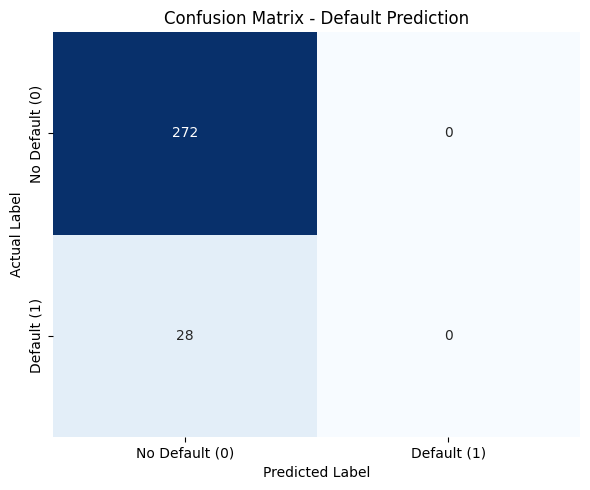


=== Top 10 Feature Importance ===
               Feature  Importance
4         credit_score    0.167722
7       debt_to_income    0.143597
5        savings_ratio    0.114052
6          loan_amount    0.095709
9  payment_punctuality    0.084522
8   credit_utilization    0.080141
3               income    0.079595
0             location    0.066691
2                  age    0.065251
1      business_sector    0.060228


/tmp/ipython-input-3252044133.py:163: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


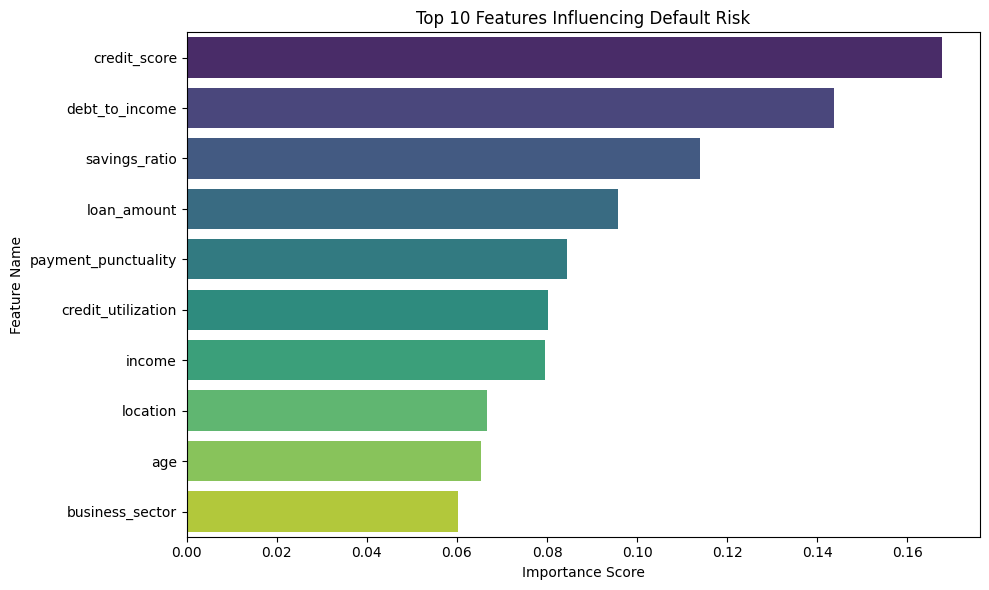

In [12]:
# ==========================================
# 1. Import Libraries
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# ==========================================
# 2. Load Data
# ==========================================
# Ensure the filename matches your uploaded file
filename = '2025_Sterling_Financial_Dataset_clean.csv'
df = pd.read_csv(filename)

print("Data Loaded Successfully!")
print(f"Data Shape: {df.shape}")

# ==========================================
# 3. Data Preprocessing (Feature Engineering)
# ==========================================

# Define Target Variable (y)
# 0 = No Default, 1 = Default
y = df['default_history']

# Define Features (X)
# We drop columns that are identifiers, raw text, or potential data leakage (risk_category)
# 'risk_category' is removed because it is directly derived from default history (cheating)
drop_columns = ['date', 'customer_id', 'customer_feedback', 'default_history', 'risk_category']
X = df.drop(columns=drop_columns)

# Encode Categorical Variables (Convert Text to Numbers)
categorical_cols = X.select_dtypes(include=['object']).columns
print(f"\nEncoding Categorical Features: {list(categorical_cols)}")

le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

print("Preprocessing Complete!")

# ==========================================
# 4. Train-Test Split
# ==========================================
# 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)









# ==========================================
# 4.5 Baseline Model: Decision Tree (强制要求)
# ==========================================
from sklearn.tree import DecisionTreeClassifier

print("\nRunning Baseline Model: Decision Tree...")

# 初始化决策树
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 预测
dt_pred = dt_model.predict(X_test)

# 计算准确率
dt_acc = accuracy_score(y_test, dt_pred)
print(f"=== Decision Tree (Baseline) Accuracy: {dt_acc:.4f} ===")

# --- 之后紧接着运行你原来的 Random Forest 代码 ---
print(f"=== Random Forest (Your Model) Accuracy: {acc:.4f} ===") # 假设 acc 是你之前跑出来的随机森林准确率

# 计算提升
improvement = acc - dt_acc
print(f"\nModel Improvement: {improvement*100:.2f}%")

















# ==========================================
# 5. Model Development (Random Forest)
# ==========================================
print("\nTraining Random Forest Model...")


#  (add class_weight='balanced'):
rf_model = RandomForestClassifier(n_estimators=100,
                                  random_state=42,
                                  class_weight='balanced') # <--- handle imblance

rf_model.fit(X_train, y_train)
print("Model Training Complete!")

# ==========================================
# 6. Model Evaluation
# ==========================================
# Predictions
y_pred = rf_model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\n=== Model Accuracy: {acc:.4f} ===")

# Classification Report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization (All English Labels)
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)

# Labels: 0 -> No Default, 1 -> Default
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Default (0)', 'Default (1)'],
            yticklabels=['No Default (0)', 'Default (1)'])

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Default Prediction')
plt.tight_layout() # Adjust layout to prevent clipping
plt.show()

# ==========================================
# 7. Model Interpretation (Feature Importance)
# ==========================================
# Extract Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns

# Create DataFrame for plotting
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\n=== Top 10 Feature Importance ===")
print(feature_importance_df.head(10))

# Plot Feature Importance (All English Labels)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')

plt.title('Top 10 Features Influencing Default Risk')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()